## Prediction of taxi fare

In [107]:
#Basic and most important libraries
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization


#Classifiers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb     #ML algorithm

#Model evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix


%matplotlib inline

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [108]:
# Loading Data
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
data.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [109]:
print("shape of dataing data is: ",data.shape) #checking the number of rows and columns in dataing data

shape of dataing data is:  (50000, 8)


In [110]:
data.dtypes #checking the data-types in dataing dataset

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [111]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


## Data Cleaning & Missing Value Analysis




In [112]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

No missing value found

In [113]:
del data['unique_id']   # no need of unique id in EDA
data.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [114]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
data['date_time_of_pickup'] =  pd.to_datetime(data['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')

In [115]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

data['year'] = data['date_time_of_pickup'].dt.year
data['Month'] = data['date_time_of_pickup'].dt.month
data['Date'] = data['date_time_of_pickup'].dt.day
data['Day'] = data['date_time_of_pickup'].dt.dayofweek
data['Hour'] = data['date_time_of_pickup'].dt.hour
data['Minute'] = data['date_time_of_pickup'].dt.minute

In [116]:
data.dtypes #Re-checking datatypes after conversion

amount                         float64
date_time_of_pickup     datetime64[ns]
longitude_of_pickup            float64
latitude_of_pickup             float64
longitude_of_dropoff           float64
latitude_of_dropoff            float64
no_of_passenger                  int64
year                             int64
Month                            int64
Date                             int64
Day                              int64
Hour                             int64
Minute                           int64
dtype: object

Latitudes range from -90 to 90. Longitudes range from -180 to 180

Few missing values and High values of fare and Passenger count are present. So, decided to remove them.

In [117]:
data["no_of_passenger"].describe() #Checking the passenger count variable

count    50000.000000
mean         1.667840
std          1.289195
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [118]:
# removing the values with passenger count of 0.
data = data.drop(data[data["no_of_passenger"] == 0 ].index, axis=0)

In [119]:
data["no_of_passenger"].describe()

count    49835.000000
mean         1.673362
std          1.287744
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [120]:
##finding decending order of fare to get to know whether the outliers are present or not
data["amount"].sort_values(ascending=False)

28373    200.0
1335     180.0
43956    165.0
1483     165.0
46198    160.0
         ...  
36722     -2.5
28839     -2.5
2039      -2.9
13032     -3.0
42337     -5.0
Name: amount, Length: 49835, dtype: float64

In [121]:
data = data.drop(data[data["amount"]<0].index, axis=0)
data.shape

(49829, 13)

In [122]:
#Also remove the row where fare amount is zero
data = data.drop(data[data["amount"]<1].index, axis=0)
data.shape

(49825, 13)

In [123]:
##finding decending order of fare to get to know whether the outliers are present or not
data["amount"].sort_values(ascending=False)

28373    200.0
1335     180.0
1483     165.0
43956    165.0
46198    160.0
         ...  
34445      2.5
28444      2.5
8711       2.5
49292      2.5
17862      2.5
Name: amount, Length: 49825, dtype: float64

In [124]:
##make sure there is no negative values in the fare_amount variable column
data["amount"].min()

2.5

Now checking the pickup lattitude and longitude :

In [125]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

In [126]:
data = data.drop((data[data['latitude_of_pickup']<-90]).index, axis=0)
data = data.drop((data[data['latitude_of_pickup']>90]).index, axis=0)

In [127]:
data[data['longitude_of_pickup']<-180]
data[data['longitude_of_pickup']>180]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [128]:
data[data['latitude_of_dropoff']<-90]
data[data['latitude_of_dropoff']>90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [129]:
data[data['longitude_of_dropoff']<-180]
data[data['longitude_of_dropoff']>180]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute


In [130]:
data.shape

(49824, 13)

### Now we have successfully cleaned our Dataset.Thus proceeding for further operations:

Calculating distance based on the given coordinates :


In [131]:
#As we know that we have given pickup longitute and latitude values and same for drop.
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km


In [132]:
data['distance'] = data[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff']].apply(haversine,axis=1)

In [133]:
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [134]:
data.nunique()

amount                    697
date_time_of_pickup     49380
longitude_of_pickup     33652
latitude_of_pickup      36515
longitude_of_dropoff    34808
latitude_of_dropoff     37336
no_of_passenger             6
year                        7
Month                      12
Date                       31
Day                         7
Hour                       24
Minute                     60
distance                48379
dtype: int64

In [135]:
##finding decending order of fare to get to know whether the outliers are presented or not
print(data['distance'].sort_values(ascending=False))

48996    8667.818812
31823    8667.572331
9147     8667.542104
37798    8667.534293
8647     8667.497512
            ...     
16945       0.000000
45983       0.000000
45985       0.000000
16926       0.000000
49999       0.000000
Name: distance, Length: 49824, dtype: float64


<Axes: xlabel='distance'>

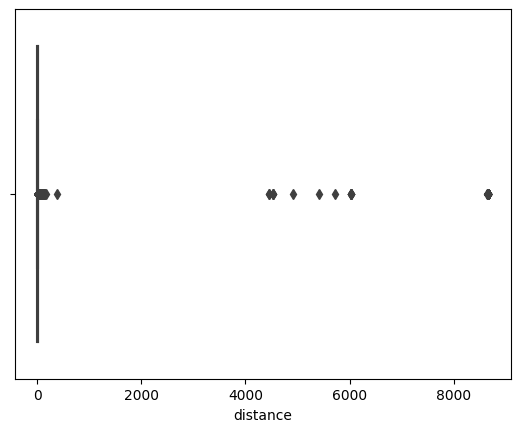

In [136]:
sns.boxplot(x='distance',data=data)

In [137]:
# we will remove the rows whose distance value is zero

data = data.drop(data[data['distance']== 0].index, axis=0)
data.shape

(48378, 14)

In [138]:
#we will remove the rows whose distance values is very high which is more than 129kms
data = data.drop(data[data['distance'] > 130 ].index, axis=0)
data.shape

(48288, 14)

<Axes: xlabel='distance'>

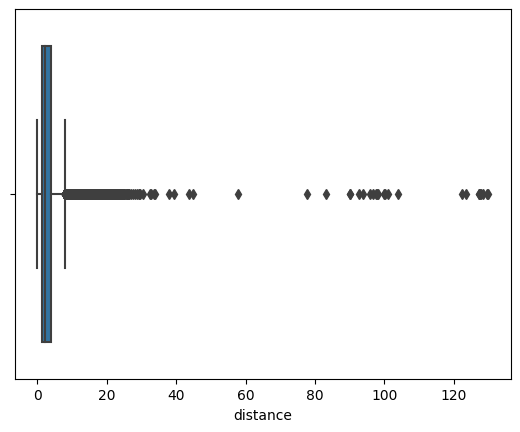

In [139]:
sns.boxplot(x='distance',data=data)

In [140]:
data.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickupDate variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [141]:
drop = ['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup','longitude_of_dropoff', 'latitude_of_dropoff', 'Minute']
data = data.drop(drop, axis = 1)

In [142]:
data.head()

,amount,no_of_passenger,year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
1,16.9,1,2010,1,5,1,16,8.450134
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157


In [143]:
data['no_of_passenger'] = data['no_of_passenger'].astype('int64')
data['year'] = data['year'].astype('int64')
data['Month'] = data['Month'].astype('int64')
data['Date'] = data['Date'].astype('int64')
data['Day'] = data['Day'].astype('int64')
data['Hour'] = data['Hour'].astype('int64')

In [144]:
data.dtypes

amount             float64
no_of_passenger      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

## Data Visualization

Visualization of following:

1.Number of Passengers effects the the fare

2.Pickup date and time effects the fare

3.Day of the week does effects the fare

4.Distance effects the fare




<Axes: xlabel='no_of_passenger', ylabel='count'>

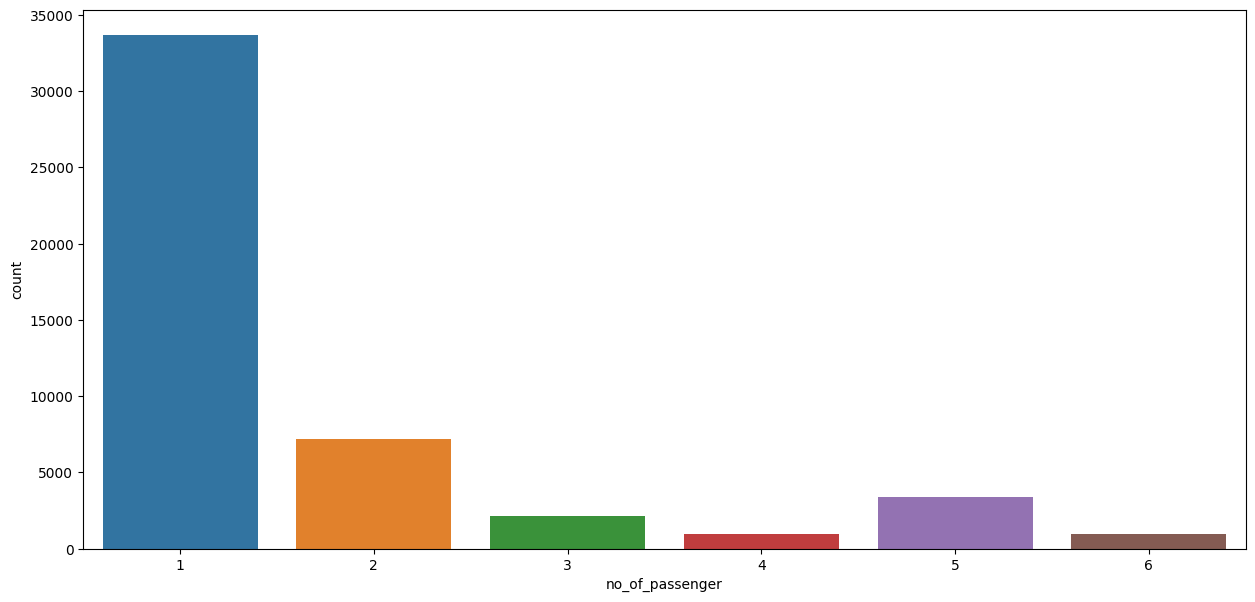

In [145]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="no_of_passenger", data=data)

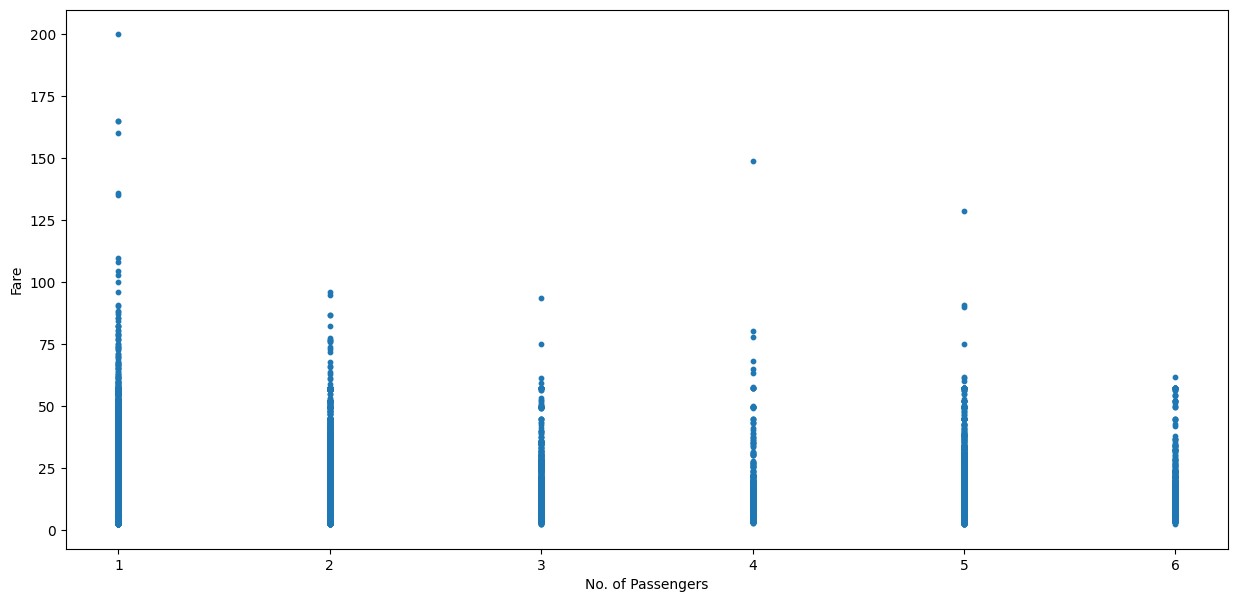

In [146]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=data['no_of_passenger'], y=data['amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

Observations :
By seeing the above plots we can easily conclude that:

single travelling passengers are most frequent travellers.

At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers

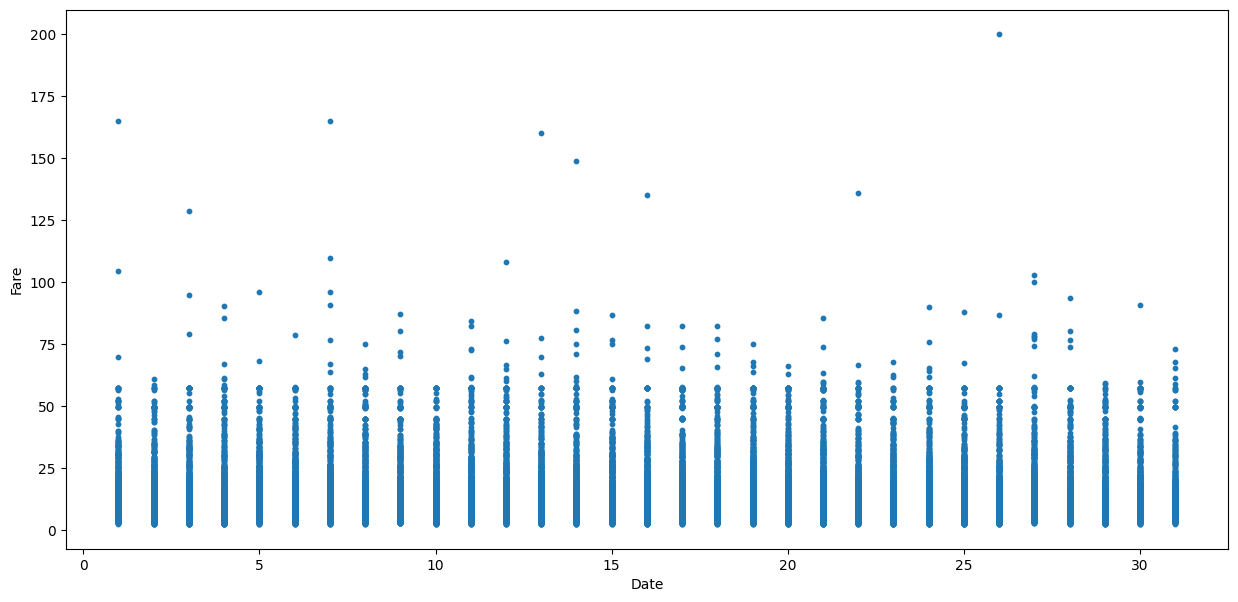

In [147]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=data['Date'], y=data['amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

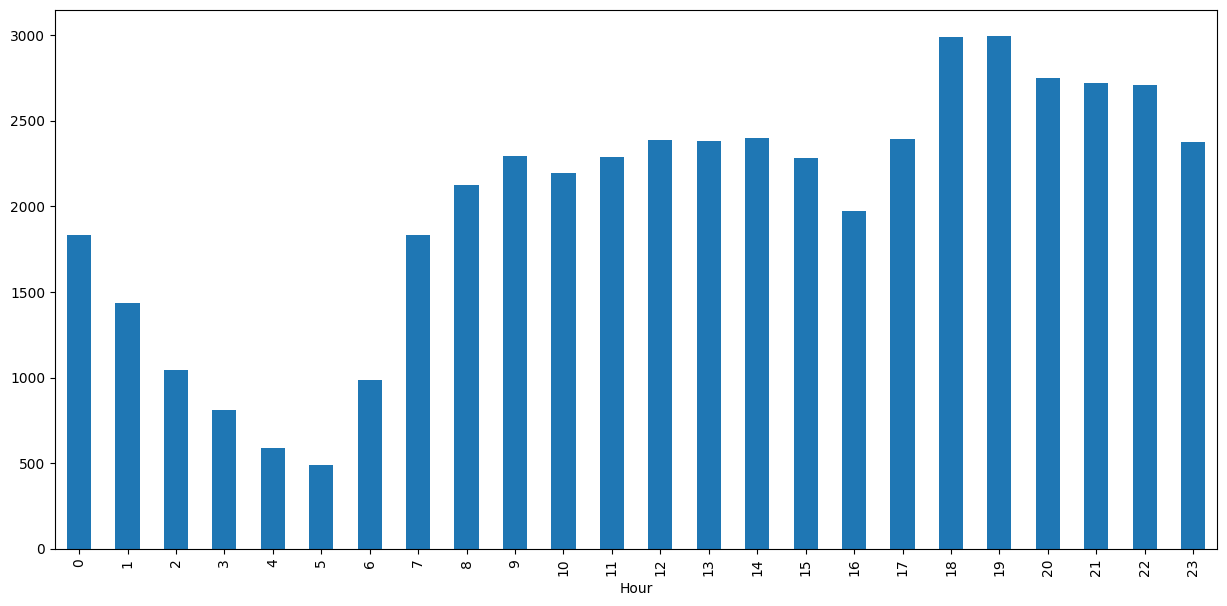

In [148]:
plt.figure(figsize=(15,7))
data.groupby(data["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

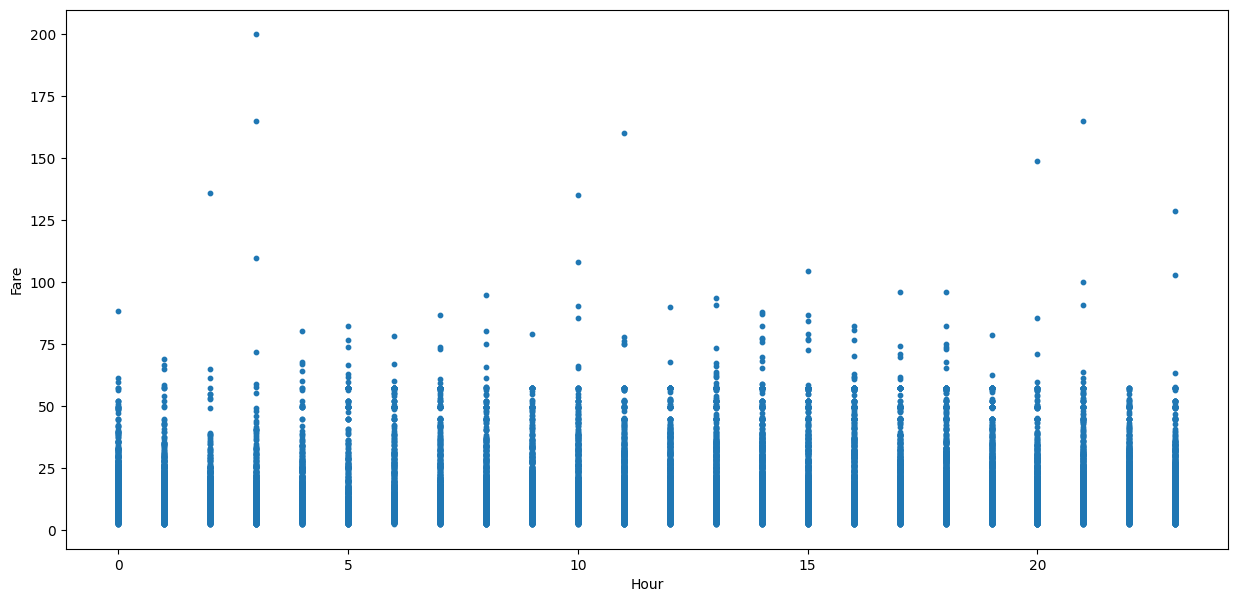

In [149]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=data['Hour'], y=data['amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. Hence we can assume that cabs taken early in morning and late at night are costliest

<Axes: xlabel='Day', ylabel='count'>

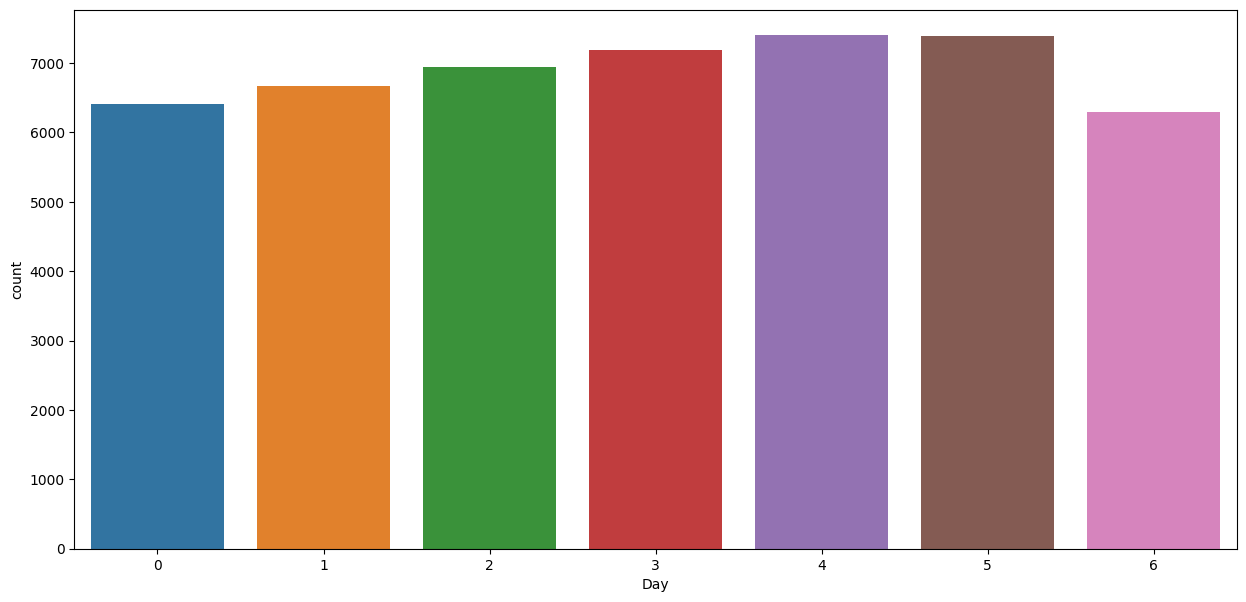

In [150]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=data)

Observation :
The day of the week does not seem to have much influence on the number of cabs ride

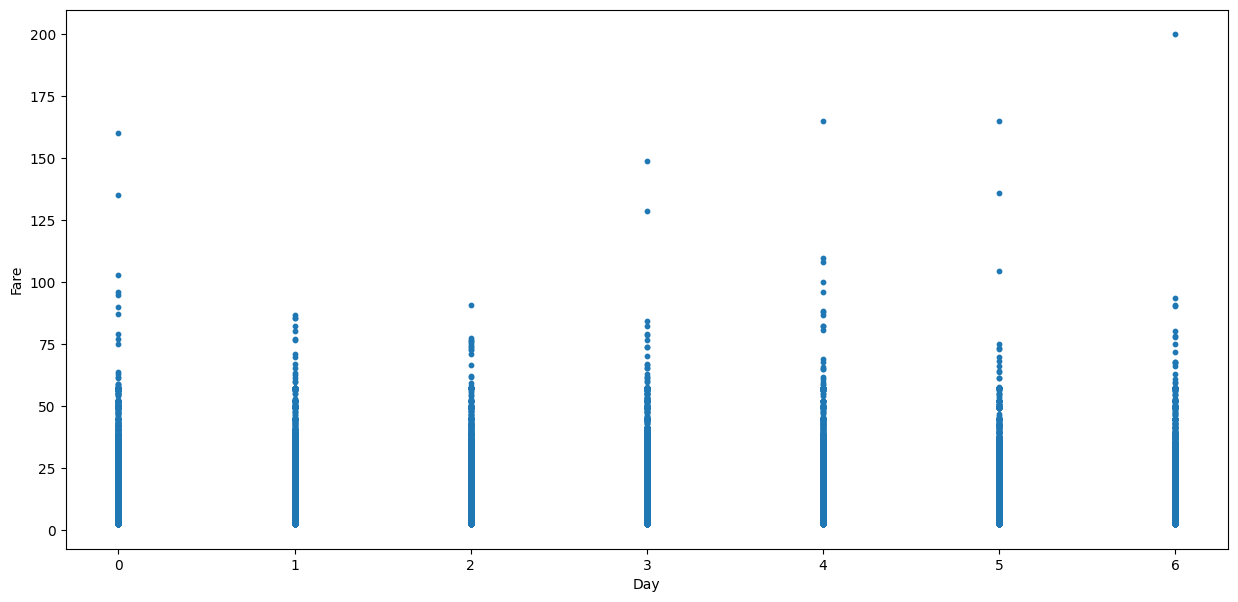

In [151]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=data['Day'], y=data['amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

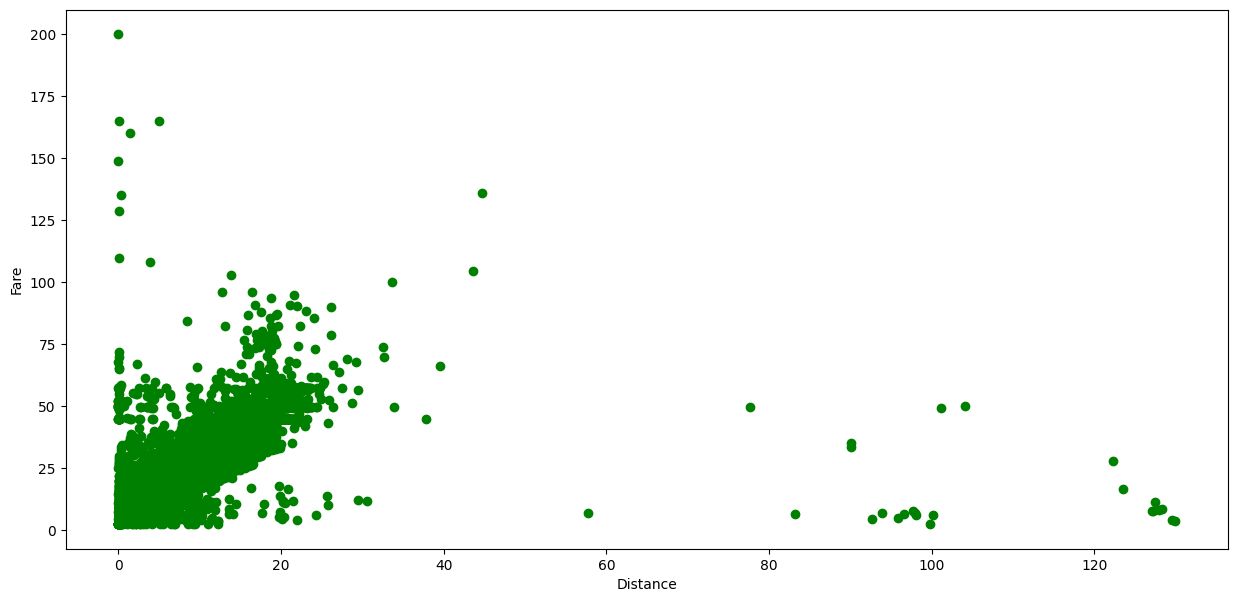

In [152]:
#Relationship between distance and fare
plt.figure(figsize=(15,7))
plt.scatter(x = data['distance'],y = data['amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

It is quite obvious that distance will effect the amount of fare

## Feature Scaling

amount


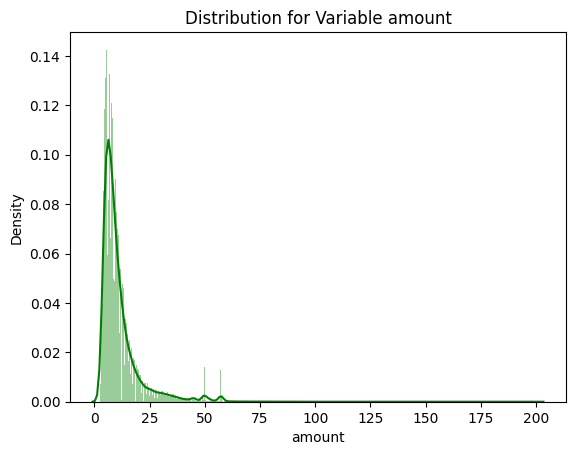

distance


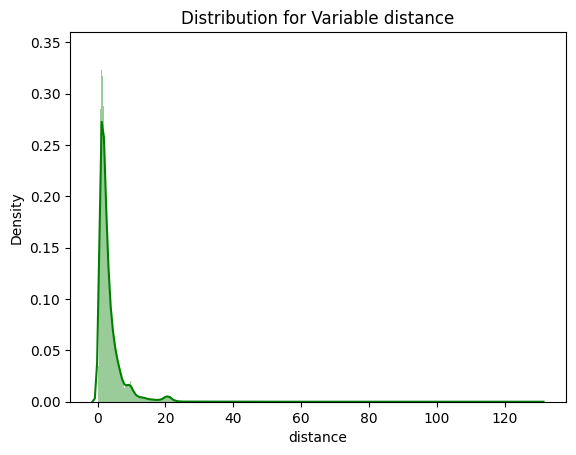

In [153]:
#Normality check of dataing data is uniformly distributed or not-

for i in ['amount', 'distance']:
    print(i)
    sns.distplot(data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [154]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
data['amount'] = np.log1p(data['amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
data['distance'] = np.log1p(data['distance'])

amount


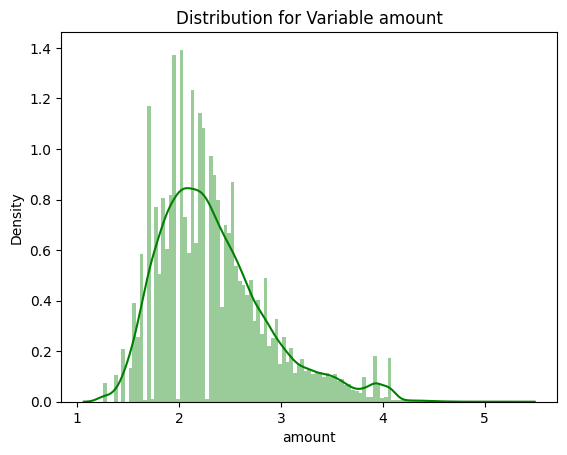

distance


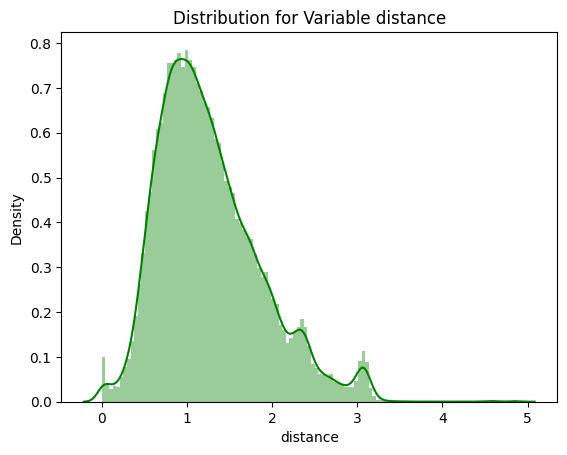

In [155]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['amount', 'distance']:
    print(i)
    sns.distplot(data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our training data

### Applying ML ALgorithms

In [156]:
x= data.drop('amount',axis=1)
y=data['amount']

In [157]:
##data test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( x,y, test_size = 0.20, random_state = 1)

In [158]:
print(X_train.shape)
print(X_test.shape)

(38630, 7)
(9658, 7)


In [159]:
# Building model on top of training dataset

fit_LR = LinearRegression().fit(X_train , y_train)

#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [160]:
print("Root Mean Squared Error For trainaing data = "+ str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For trainaing data = 0.26531008011326374
Root Mean Squared Error For Test data = 0.2635088894727669


In [161]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7624281883075769

In [162]:
r2_score(y_test, pred_test_LR)

0.7659349212514757

Decision tree Model

In [163]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#prediction on data data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))


In [164]:
print("Root Mean Squared Error For training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For training data = 0.2955262086739361
Root Mean Squared Error For Test data = 0.2929053809721867


In [165]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.705232625941542

In [166]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7107983389263755

### Random Forest Model

In [167]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [168]:
print("Root Mean Squared Error For training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For training data = 0.09014420018784483
Root Mean Squared Error For Test data = 0.23796554467506303


In [169]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9725739674188125

In [170]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.809113927746359

### Gradient Boosting

In [171]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [172]:
print("Root Mean Squared Error For training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For training data = 0.2272123933354028
Root Mean Squared Error For Test data = 0.22702964397090014


In [173]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.8262554386854777

In [174]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8257585643531753

In [175]:

print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR),'for LR')

print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT),'for DT')

print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF),'for RF')

print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB),'for GB')

Root Mean Squared Error For Test data = 0.2635088894727669 for LR
Root Mean Squared Error For Test data = 0.2929053809721867 for DT
Root Mean Squared Error For Test data = 0.23796554467506303 for RF
Root Mean Squared Error For Test data = 0.22702964397090014 for GB


It has been observed that RandomForest and GradientBoosting performing well, so we can optimize results with parameter tuning

## Optimizing the results with parameters tuning

In [176]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [177]:
##Random Hyperparameter Grid


from sklearn.model_selection import train_test_split,RandomizedSearchCV


##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,200,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 129, 'max_depth': 65}
R-squared = 0.81.
RMSE =  0.23903664434867927


In [ ]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

In [183]:
# for best parameters of Random Forest
fit_RF = RandomForestRegressor(n_estimators = 129,max_depth=65).fit(X_train,y_train)

#prediction on data data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

print("Root Mean Squared Error For training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))
## calculate R^2 for train data
print(r2_score(y_train, pred_train_RF),'r2 score for train data')
#calculate R^2 for test data
print(r2_score(y_test, pred_test_RF),'r2 score for test data')

Root Mean Squared Error For training data = 0.09097791317358278
Root Mean Squared Error For Test data = 0.23853473026255506
0.9720643134024476 r2 score for train data
0.8081996816116066 r2 score for test data


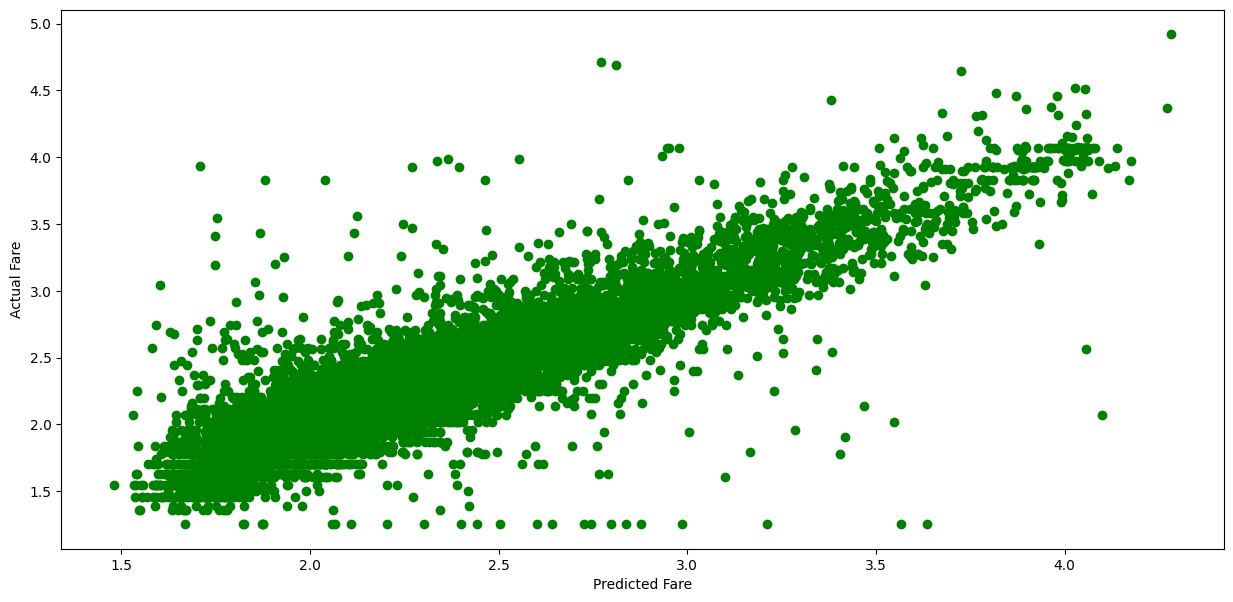

In [180]:
plt.figure(figsize=(15,7))
plt.scatter(x = pred_test_RF,y = y_test,c = "g")
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.show()

In [181]:
# for best parameters GradientBoostingRegressor
fit_GB = GradientBoostingRegressor(max_depth=7,n_estimators=19).fit(X_train, y_train)

#prediction on data data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

print("Root Mean Squared Error For training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

## calculate R^2 for train data
print(r2_score(y_train, pred_train_GB),'r2 score train data')
#calculate R^2 for test data
print(r2_score(y_test, pred_test_GB),'r2 score for test data')



Root Mean Squared Error For training data = 0.23280452744583324
Root Mean Squared Error For Test data = 0.24233700299370461
0.8170761842896043 r2 score train data
0.8020363065525048 r2 score for test data


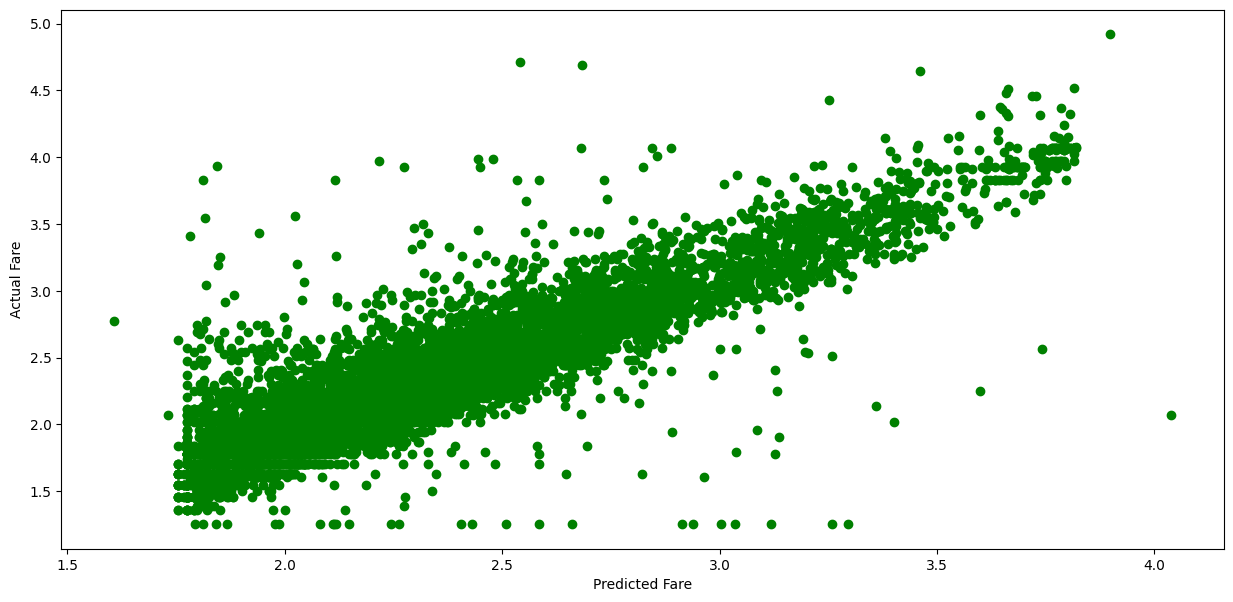

In [182]:
plt.figure(figsize=(15,7))
plt.scatter(x = pred_test_GB,y = y_test,c = "g")
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.show()

## By comparing above two models we can say that random forest is the best fit model for predicting taxi fare.

In [184]:
test_data=pd.DataFrame(X_test)
pred_test_RF = fit_RF.predict(X_test)

In [185]:
test_data['predicted_fare']=pred_test_RF

In [186]:
test_data.to_csv('submission1.csv', index = False)